In [14]:
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

In [18]:

dataset = pd.read_csv('bank.csv')
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Removeing RowNumber,CustomerId,Surname

In [28]:
X = dataset.iloc[:,3:13]
target = np.array(target)
display(X.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [30]:
X_columns = dataset.columns.tolist()[3:12]
y_columns = dataset.columns.tolist()[-1:]
print(f'All columns: {dataset.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

y values: ['Exited']


In [32]:
X = dataset[X_columns].values # Credit Score through Estimated Salary
y = dataset[y_columns].values # Exited

In [33]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [34]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


Feature scaling is a method used to standardize the range of independent variables or features of data. It is basically scaling all the dimensions to be even so that one independent variable does not dominate another.

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [36]:
X = pipeline.fit_transform(X)

In [37]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [38]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 10), (8000, 1)
testing shapes: (2000, 10), (2000, 1)


Start: NN

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [40]:
# Initializing the ANN
classifier = Sequential()

In [41]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

We are going to add another layer to this model because we want to implement Deep Learning, which is an artificial Neural network with many layers

In [43]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

Adding the output layer
The breakdown of the inputs for the output layer is as follows:
activiation: sigmoid becasue we are in an output layer. uses the Sigmoid activation function for  ϕ . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

In [45]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

If we want more than two categories, then we will need to change
1) the units parameter to match the desired category count

2) the activation field to softmax. Basically a sigmoid function but applied to a dependent variable that has more than 2 categories.

In [46]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7

Compiling the Neural Network
Basically applying Stochastic Gradient descent on the whole Neural Network. We are Tuning the individual weights on each neuron.

The breakdown of the inputs for compiling is as follows:
optimizer: adam The algorithm we want to use to find the optimal set of weights in the neural networks. Adam is a very efficeint variation of Stochastic Gradient Descent.

loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

metrics: [accuracy] The accuracy metrics which will be evaluated(minimized) by the model. Used as accuracy criteria to imporve model performance.

In [48]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Fitting the Neural Network
This is where we will be fitting the NN to our training set.

The breakdown of the inputs for compiling is as follows:
X_train The independent variable portion of the data which needs to be fitted with the model.

Y_train The output portion of the data which the model needs to produce after fitting.

batch_size: How often we want to back-propogate the error values so that individual node weights can be adjusted.

epochs: The number of times we want to run the entire test data over again to tune the weights. This is like the fuel of the algorithm.

validation_split: 0.2 The fraction of data to use for validation data.

In [49]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
225/225 - 0s - loss: 0.5349 - accuracy: 0.7961 - val_loss: 0.5114 - val_accuracy: 0.7950
Epoch 2/200
225/225 - 0s - loss: 0.5044 - accuracy: 0.7961 - val_loss: 0.4991 - val_accuracy: 0.7950
Epoch 3/200
225/225 - 0s - loss: 0.4944 - accuracy: 0.7961 - val_loss: 0.4878 - val_accuracy: 0.7950
Epoch 4/200
225/225 - 0s - loss: 0.4833 - accuracy: 0.7961 - val_loss: 0.4764 - val_accuracy: 0.7950
Epoch 5/200
225/225 - 0s - loss: 0.4738 - accuracy: 0.7961 - val_loss: 0.4655 - val_accuracy: 0.7950
Epoch 6/200
225/225 - 0s - loss: 0.4629 - accuracy: 0.7961 - val_loss: 0.4567 - val_accuracy: 0.7950
Epoch 7/200
225/225 - 0s - loss: 0.4583 - accuracy: 0.7961 - val_loss: 0.4509 - val_accuracy: 0.7950
Epoch 8/200
225/225 - 0s - loss: 0.4554 - accuracy: 0.7961 - val_loss: 0.4483 - val_accuracy: 0.7950
Epoch 9/200
225/225 - 0s - loss: 0.4532 - accuracy: 0.7961 - val_loss: 0.4472 - val_accuracy: 0.7950
Epoch 10/200
225/225 - 0s - loss: 0.4480 - accuracy: 0.7961 - val_loss: 0.4454 - val_accura

The output network should converge to an accuracy of around 85%

Testing the NN
Predicting the Test set results
This shows the probability of a customer leaving given the testing data. Each row in X_test corresponds to a row in Y_test

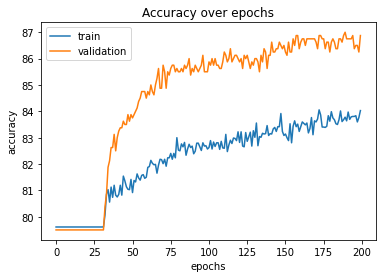

In [56]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [51]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.26552695]
 [0.3239069 ]
 [0.11901692]
 [0.0535298 ]
 [0.10854188]]


To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.

In [52]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
Making the Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1515   80]
 [ 208  197]]


Percentage of Test data Classified

In [54]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

85.6 % of testing data was classified correctly
